In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Creating a random dataset to understand OLS ,RMSE ,MSE, MAE , ME and using Linear Regression**

In [79]:
num_samples = 100

# Generate random heights (in cm)
heights = np.random.randint(120, 180, num_samples)

# Define a linear relationship between height and weight
# For example, Weight = 0.5 * Height - 50 + noise
weights = 0.5 * heights - 50 + np.random.randint(45, 110, num_samples)
weights = (weights).astype(int)

# Create a pandas DataFrame
df = pd.DataFrame({
    'Height': heights,
    'Weight': weights
})

# Display the first few rows of the dataset
print(df.head())


   Height  Weight
0     172     115
1     144     126
2     163     127
3     123      96
4     120     103


In [80]:
# Display the first few rows of the DataFrame
df.head()

,Height,Weight
0,172,115
1,144,126
2,163,127
3,123,96
4,120,103


**Just checking whether there's any value like null / nAn and do i need to apply feature engineering in it.**

In [81]:
df.isnull().sum()+df.isna().sum()
#df.isnull().sum()+df.isna().sum()+1

,0
Height,0
Weight,0


Text(0, 0.5, 'Height')

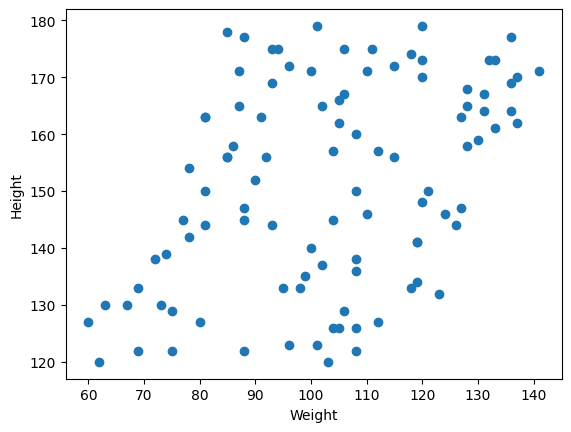

In [82]:
# Scatterplot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [83]:
df.corr()

,Height,Weight
Height,1.00000,0.40792
Weight,0.40792,1.00000


**Between Height - Height there's no variance , therefore its 1 but incase of Weight-Height there's highly +ive correlation.
The method being used by default here is Pearson Correlation.**

**Same correlation can be observed graphically using sns.pairplot as well**

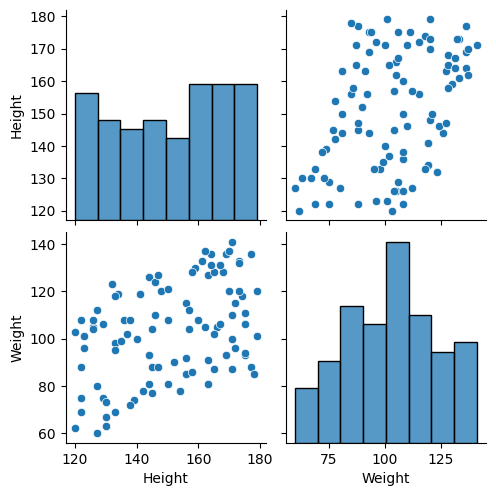

In [84]:
sns.pairplot(df)

In [85]:
  df. describe()

,Height,Weight
count,100.000000,100.000000
mean,151.130000,102.980000
std,17.889478,20.344994
min,120.000000,60.000000
25%,134.750000,87.750000
50%,153.000000,104.000000
75%,167.000000,119.250000
max,179.000000,141.000000


In [86]:
type(df['Height'])

pandas.core.series.Series

In [87]:
type(df)

pandas.core.frame.DataFrame

In [88]:
type([df['Weight']])

list

**Input features should be in DataFrame or in 2-D Array**

**Whereas Output features can be in series or in 1-D Array**

In [90]:
X= df[['Weight']]
X.shape
type(X)

pandas.core.frame.DataFrame

In [91]:
y = df['Height']
np.array(y).shape

(100,)

In [94]:
# Dataset split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_state means randomization / reshuffling of the sets while selecting for train & test ds

In [95]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [96]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_train_scaled

array([[ 1.17339801],
       [ 1.56029895],
       [-1.14800763],
       [ 1.4152111 ],
       [ 0.30287089],
       [ 0.20614566],
       [-0.76110669],
       [-1.09964502],
       [ 0.68977183],
       [-0.66438146],
       [-0.51929361],
       [-0.18075528],
       [-0.08403005],
       [ 0.78649707],
       [-0.61601884],
       [-0.80946931],
       [-0.56765622],
       [ 1.60866157],
       [-0.51929361],
       [-0.27748052],
       [-1.77672166],
       [-0.51929361],
       [-1.24473287],
       [-0.80946931],
       [ 1.4152111 ],
       [-1.24473287],
       [ 1.36684848],
       [ 0.01269519],
       [ 1.12503539],
       [-1.43818334],
       [-0.37420575],
       [-0.37420575],
       [ 1.17339801],
       [ 0.0610578 ],
       [-1.29309549],
       [-0.2291179 ],
       [ 1.27012324],
       [ 0.73813445],
       [ 0.78649707],
       [-0.90619455],
       [-0.76110669],
       [-0.08403005],
       [ 1.56029895],
       [ 0.83485969],
       [-0.90619455],
       [ 0

**fit_transform() means taking sd and mean (z-test) and standardizing train ds and then the same values of sd & and mean is applied with the help transform() to test ds. (using same z-test).
It helps in preventing _Data Leakage_**

If fit_transform() is applied to test ds again , it calculates the same values again but for test ds , which makes test ds known to our model and model would treat this as train ds instead of test.

In [97]:
X_test_scaled=scaler.transform(X_test)
X_train_scaled

array([[ 1.17339801],
       [ 1.56029895],
       [-1.14800763],
       [ 1.4152111 ],
       [ 0.30287089],
       [ 0.20614566],
       [-0.76110669],
       [-1.09964502],
       [ 0.68977183],
       [-0.66438146],
       [-0.51929361],
       [-0.18075528],
       [-0.08403005],
       [ 0.78649707],
       [-0.61601884],
       [-0.80946931],
       [-0.56765622],
       [ 1.60866157],
       [-0.51929361],
       [-0.27748052],
       [-1.77672166],
       [-0.51929361],
       [-1.24473287],
       [-0.80946931],
       [ 1.4152111 ],
       [-1.24473287],
       [ 1.36684848],
       [ 0.01269519],
       [ 1.12503539],
       [-1.43818334],
       [-0.37420575],
       [-0.37420575],
       [ 1.17339801],
       [ 0.0610578 ],
       [-1.29309549],
       [-0.2291179 ],
       [ 1.27012324],
       [ 0.73813445],
       [ 0.78649707],
       [-0.90619455],
       [-0.76110669],
       [-0.08403005],
       [ 1.56029895],
       [ 0.83485969],
       [-0.90619455],
       [ 0

In [98]:
# Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

**The below code should produce error the input param(s) are of type Series , when the fit() was requesting for 2-D array type params**

So taking X_train_series would be erroneous here .



```
X_train_series = df['Weight']
regression.fit(X_train_series,y)
```
```
ValueError                                Traceback (most recent call last)

<ipython-input-64-cb2502d12372> in <cell line: 2>()
      1 X_train_series = df['Weight']
----> 2 regression.fit(X_train_series,y)


ValueError: Expected 2D array, got 1D array instead:
array=[107  96  48  52  48 109  47  64  76  62  47 108 101  99  67  73  74 105
  87  67  55  66  53  72  96  45  60  86 106  97  88  96 105  48  49  56
  52  84  91 106  89 104 105  96  45  79  80  96  48  46  83  85  46  66
  64 100  63  95 109  72  49  93 105  97  61  53  66  68  79  51  77  59
  70  46 103  55  96  88  83 104  82  75  83 102  48  58  70  76  49  55
  83  67  70  53 101  89  60  86  88  55].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
```


In [99]:
regression.fit(X_train,y_train)

LinearRegression()

When the task is to use all processor ==> n_job = -1
else state the # of processors to be used
```
regression=LinearRegression(n_job=-1)
```
The output after regression.fit(X_train,y_train) would be as
```
LinearRegression(n_job=-1)
```


In [100]:
print(f'coefficient or slope (beta 0) or m term: {regression.coef_}')
print(f'intercept (beta 1) or c term: {regression.intercept_}')

coefficient or slope (beta 0) or m term: [0.35572944]
intercept (beta 1) or c term: 114.53501707976417


**This means 1 unit movement in weight value would lead to 0.355 movement in the height value**

**When weight value =0 , that is x axis point is 0 then the line ŷ (predicted line) would intercept at 114.53 point on y-axis**

Text(0, 0.5, 'y_train')

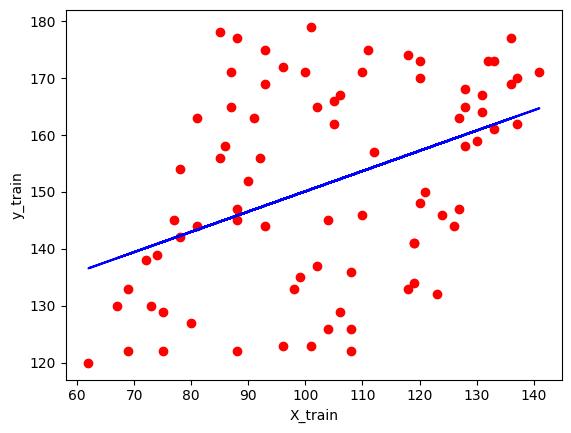

In [101]:
## plot training data best fit line
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regression.predict(X_train),color='blue')
plt.xlabel('X_train')
plt.ylabel('y_train')


**Predicted Test output**


1.   pred height output = intercept + coef_(weights)
2.   y_pred_test = 114.53 + -0.355 (X_test)



In [103]:
y_pred =regression.predict(X_test)

In [104]:
# Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [106]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MSE: 286.11390881576443
MAE: 14.170634920634921
RMSE: 16.91490197476073


**R Square**
**R^2 = 1- SS_Res / SS_T**

R^2 = coefficient of determination,

SS_Res = sum of squares of residual,

SS_T = sum of squared of total

In [108]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.13662479611405176

**Adjusted R^2**

In [112]:
adjScore = 1-(1-0.1367)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjScore

0.08873888888888892

In [113]:
# using OLS Linear Regression
import statsmodels.api as sm

In [115]:
model = sm.OLS(y_train,X_train).fit()
predictionOLS = model.predict(X_test)
predictionOLS

,0
83,141.762622
53,163.027015
70,192.797166
45,89.310452
44,153.103632
39,120.498229
22,148.850753
80,170.115146
10,85.057573
0,163.027015


In [120]:
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2338.
Date:                Sun, 01 Sep 2024   Prob (F-statistic):                    1.89e-60
Time:                        07:48:15   Log-Likelihood:                         -378.84
No. Observations:                  80   AIC:                                      759.7
Df Residuals:                      79   BIC:                                      762.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [122]:
regression.predict([[72]])

array([140.14753686])

It seems to be a high value , lets scale the test value

In [124]:
regression.predict(scaler.transform([[72]]))

array([113.98900491])